# Results Comparisons

In [1]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.simplefilter("ignore")


# load dataset
# Reading data from csv file
data = pd.read_csv("data.csv", sep = ",")
# Looking for any null/missing values in the data set
print("Looking for any null/missing values in the data set")
print(data.isnull().any())
#convert nominal values to numerical
data.material = [0 if each == "abs" else 1 for each in data.material]                  # abs = 0, pla = 1
data.infill_pattern = [0 if each == "grid" else 1 for each in data.infill_pattern]     # grid = 0, honeycomb = 1
#convert numerical values to nominal ---> Numerical Binning
data['elongation'] = pd.cut(data['elongation'], bins=[0,1,3,4], labels=["small", "big", "very_big"])

X = data[['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern','nozzle_temperature', 'bed_temperature', 'print_speed', 'material','fan_speed']]
y = data[['elongation']]

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('Bootstrap', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('Ridge', Ridge()))
#models.append(('LASSO', Lasso()))
models.append(('LR', LogisticRegression()))
models.append(('Gradient_Bossting ', GradientBoostingClassifier()))
models.append(('SVM', SVC()))

#models.append(('NB', GaussianNB()))


# prepare grid_parameters
SVM_grid = dict(kernel = ['poly', 'rbf', 'sigmoid'], C = [50, 10, 1.0, 0.1, 0.01], gamma = ['scale'])
GB_grid = dict(n_estimators = [10, 100, 1000], learning_rate = [0.001, 0.01, 0.1], subsample = [0.5, 0.7, 1.0], max_depth = [3, 7, 9])
Logistic_reg_grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear'], penalty = ['l2'], C = [100, 10, 1.0, 0.1, 0.01])
LASSO_grid = dict(alpha= [1e-15,1e-10,1e-8,1e-5,1e-2,1e-1, 1,0.1,0.01,0.001,2,4,5])
Ridge_grid =dict(alpha= [1e-15,1e-10,1e-8,1e-5,1e-2,1e-1, 1,0.1,0.01,0.001,2,4,5])
KNN_grid = dict(n_neighbors = range(1, 21, 2), weights = ['uniform', 'distance'], metric = ['euclidean', 'manhattan', 'minkowski'])
RF_grid = dict(max_depth =[None,9], min_samples_leaf = [1,50], max_features =['sqrt', 'log2'], n_estimators =[10,1000],criterion= ["gini","entropy"])
Bagging_grid = dict(n_estimators = [10, 100,200, 300, 1000])
DT_grid = param_dist = dict(max_depth =[1,9], min_samples_leaf = [2,9],criterion =["gini","entropy"])

grids = []
grids.append(DT_grid)
grids.append(Bagging_grid)
grids.append(RF_grid)
grids.append(KNN_grid)
#grids.append(Ridge_grid)               Ridge and LASSO need Y to be continous
#grids.append(LASSO_grid)
grids.append(Logistic_reg_grid)
grids.append(GB_grid)
grids.append(SVM_grid)
''' 
for model,grid in zip(models, grids):
    print(model[1])
    print(grid)

''' 
# evaluate each model in turn
results = []
names = []
my_scoring = 'accuracy'
for model, grid in zip(models, grids):
    print(model[0])
    kfold = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=seed)
	#kfold = model_selection.KFold(n_splits=10, random_state=seed)
    grid_search = GridSearchCV(estimator=model[1], param_grid=grid, n_jobs=-1, cv=kfold, scoring=my_scoring,error_score=0)
	#cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    grid_result = grid_search.fit(X, y)
	#results.append(cv_results)
    results.append(grid_result)
	
    names.append(model[0])
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
	#print(msg)

   
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Looking for any null/missing values in the data set
layer_height          False
wall_thickness        False
infill_density        False
infill_pattern        False
nozzle_temperature    False
bed_temperature       False
print_speed           False
material              False
fan_speed             False
roughness             False
tension_strenght      False
elongation            False
dtype: bool
CART
Best: 0.860000 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2}
Bootstrap
Best: 0.860000 using {'n_estimators': 300}
RF
Best: 0.820000 using {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 10}
KNN
Best: 0.713333 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
LR
Best: 0.760000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Gradient_Bossting 
Best: 0.860000 using {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1.0}
SVM
Best: 0.760000 using {'C': 50, 'gamma'

TypeError: unsupported operand type(s) for +: 'GridSearchCV' and 'GridSearchCV'

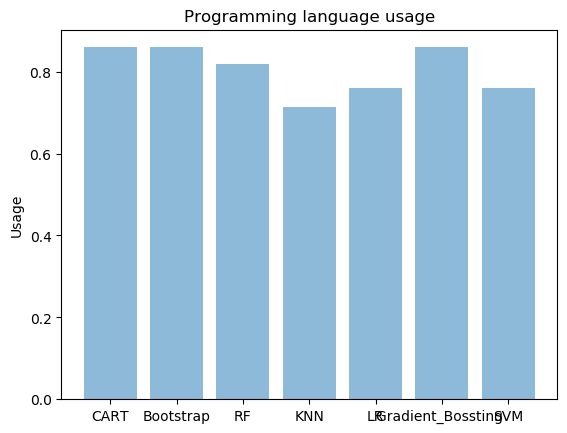

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


y_pos = np.arange(len(names))
performance = []
for acc in results:
    performance.append(acc.best_score_)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()